In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling 
import seaborn as sns


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')


In [3]:
import os
os.chdir(r"C:\Users\Admin\OneDrive\Desktop\Project\Final pyton project\Karan Project\Data")

# Data Processing

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
feature = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [114]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


# Merging all datasets 

In [5]:
train_merge_store = pd.merge(train,stores) 

In [6]:
train = pd.merge(train_merge_store,feature)

In [7]:
test_merge_store = pd.merge(test, stores)

In [8]:
test = pd.merge(test_merge_store,feature)

In [9]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [10]:
test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
train.info()

In [ ]:
test.info()

In [12]:
# Training data values

numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]

print (numeric_var_train)
print (cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [13]:
# Testing data values

numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print (numeric_var_test)
print (cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [ ]:
#pandas_profiling.ProfileReport(train)

In [14]:
train_corr=pd.DataFrame(train.corr())
train_corr.to_excel(writer,'Train_Data Corr',index=True)
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238


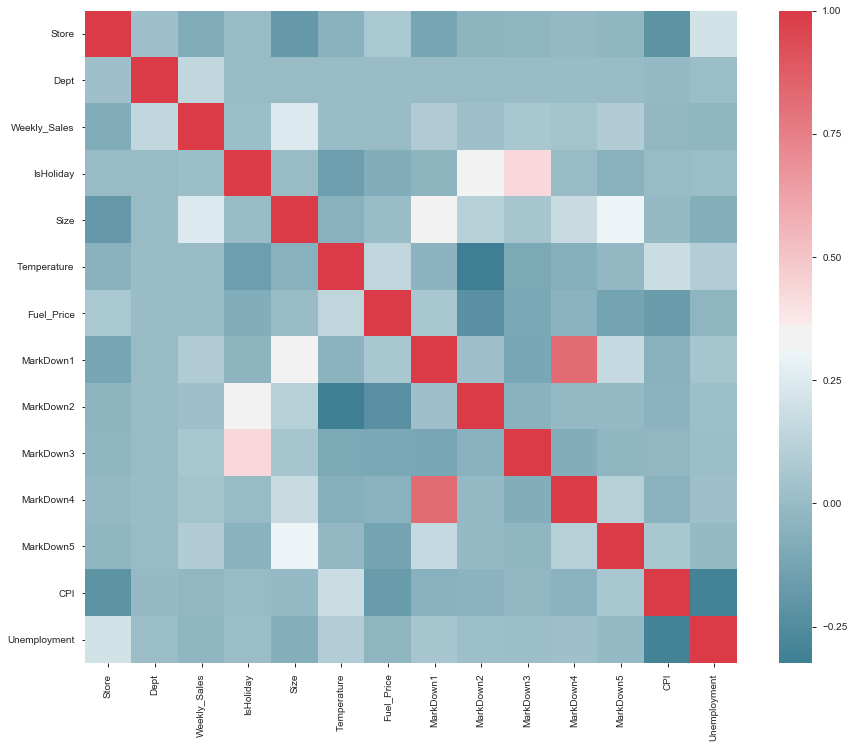

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
corr = train_corr
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [16]:
test_corr=pd.DataFrame(test.corr())

test_corr.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136


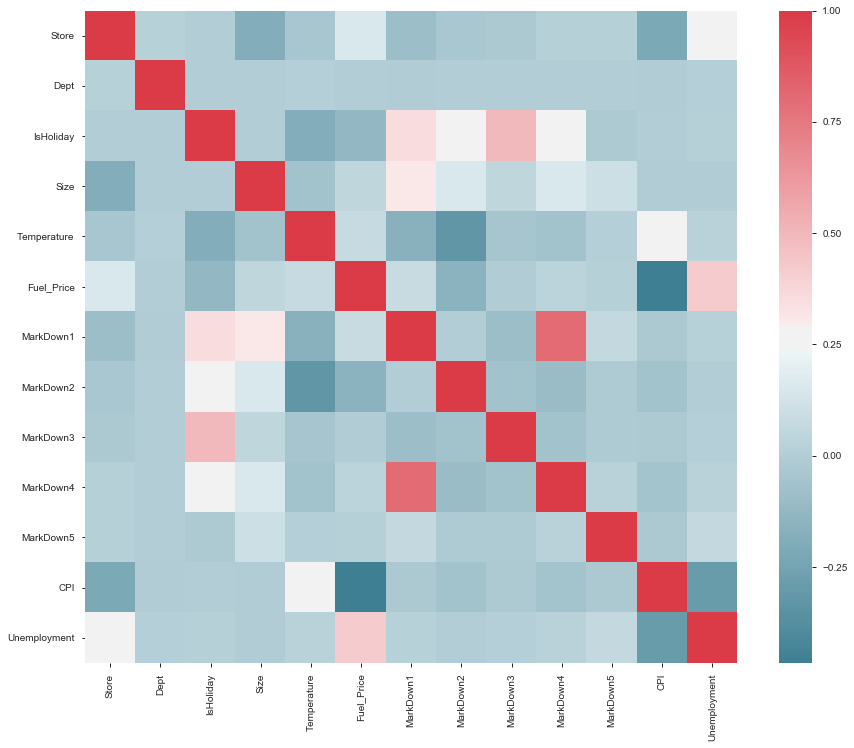

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
corr = test_corr
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Data Exploratory Analysis

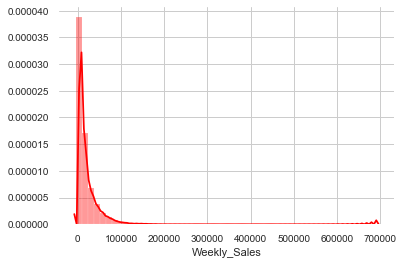

In [18]:
sns.set_style("whitegrid")
sns.distplot(train.Weekly_Sales, color="Red")

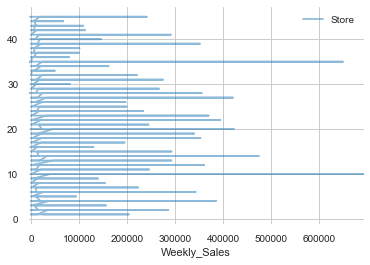

In [19]:
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

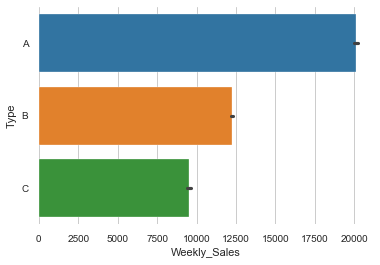

In [20]:
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

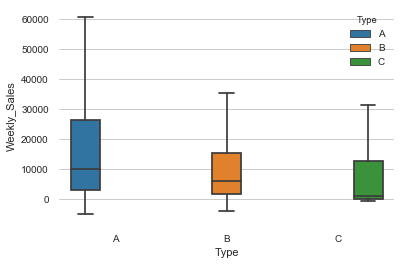

In [21]:
store_sale = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False,hue="Type")

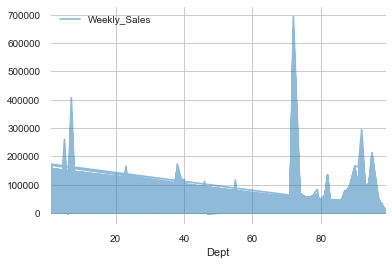

In [22]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))


# Missing value

In [23]:
print(train.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64


In [24]:
print(test.isnull().sum())

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [ ]:
#Filling missing values with mean

In [25]:
train['CPI']=train.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
train['Unemployment']=train.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [26]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [27]:
train=train.fillna(0)
test=test.fillna(0)

In [28]:
print(train.isnull().sum())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [29]:
print(test.isnull().sum())

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


# Outlier 

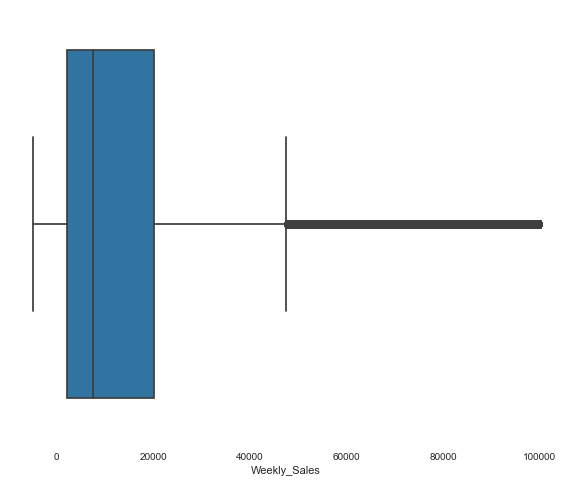

In [140]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=train['Weekly_Sales'],ax=ax)

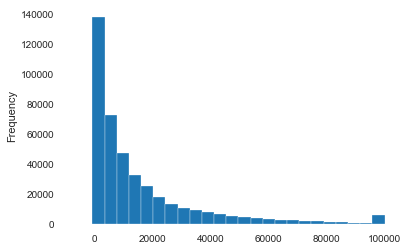

In [31]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)
# Because the sales greater than 100000 is outlier, so i have set it to 100000
sns.set_style("white")

train.Weekly_Sales.plot.hist(bins=25)

# Feature Engineering


In [32]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 71.9+ MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       115064 non-null float64
MarkDown2       115064 non-null float64
MarkDown3       115064 non-null float64
MarkDown4       115064 non-null float64
MarkDown5       115064 non-null float64
CPI             115064 non-null float64
Unemployment    115064 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


In [34]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [35]:
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [36]:
print(train.Type.value_counts())

A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [37]:
print(test.Type.value_counts())

A    58713
B    44500
C    11851
Name: Type, dtype: int64


In [ ]:
train.IsHoliday.value_counts()

In [ ]:
test.IsHoliday.value_counts()

# Splitting Store type into categorical features

In [38]:
train_test_data = [train, test]

In [39]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [41]:
#Convert 'IsHoliday' from bool to Numerical Variable 
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
Store             421570 non-null int64
Dept              421570 non-null int64
Date              421570 non-null datetime64[ns]
Weekly_Sales      421570 non-null float64
IsHoliday         421570 non-null int64
Type              421570 non-null int64
Size              421570 non-null int64
Temperature       421570 non-null float64
Fuel_Price        421570 non-null float64
MarkDown1         421570 non-null float64
MarkDown2         421570 non-null float64
MarkDown3         421570 non-null float64
MarkDown4         421570 non-null float64
MarkDown5         421570 non-null float64
CPI               421570 non-null float64
Unemployment      421570 non-null float64
Date_dayofweek    421570 non-null int64
Date_month        421570 non-null int64
Date_year         421570 non-null int64
Date_day          421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(9)
memory usag

In [43]:
# dropping unneccesarry variables
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)

In [44]:
test=test.drop(features_drop, axis=1)

In [45]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [46]:
test.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
2,1,3,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
3,1,4,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
4,1,5,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


# Split data in to training and testing set

In [151]:
# train X= all variables excluded Weekly_Sales
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

# train Y= includes only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 16), (421570,), (115064, 15))

In [154]:
X=train.drop(['Weekly_Sales','Date'], axis=1)
y=train['Weekly_Sales'] 

In [155]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
model=sm.OLS(y, X2)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2926.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        04:14:13   Log-Likelihood:            -4.7636e+06
No. Observations:              421570   AIC:                         9.527e+06
Df Residuals:                  421555   BIC:                         9.527e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Store            -74.2877      2.439    -30.

# Model 1 Linear Regression

In [61]:

## Methood 1..
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
print ('score:'+str(acc_linear) + ' %')

score:8.86 %


# Model 2 Random Forest

In [50]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



# Model 3 Decision Tree

In [123]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

100.0 percent


In [ ]:
#KNN

In [64]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.neighbors import KNeighborsRegressor
#knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
#knn.fit(train_X,train_y)
#y_pred = knn.predict(test_X)
#print(y_pred)


Checking all the models

In [62]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.77
0,Linear Regression,8.86


Prediction based on Highest accuracy which is 100 % for decision tree

In [55]:
Final_Prediction = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

In [56]:
Final_Prediction.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2012-11-02,34106.6578
1,1_2_2012-11-02,47767.2017
2,1_3_2012-11-02,10800.4601
3,1_4_2012-11-02,38334.8571
4,1_5_2012-11-02,32143.9076
